In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [26]:
!nvidia-smi

Thu Oct  9 06:25:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P0             28W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Trainig/Happy/22.jpg')

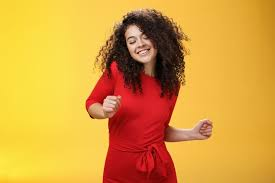

In [4]:
img

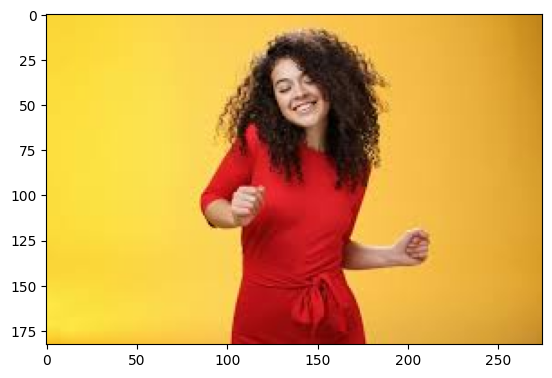

In [5]:
plt.imshow(img)

In [6]:
i1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Trainig/Happy/22.jpg')
#Using open cv
## dimension matrix are created for the image
#The value ranges from Pixel(0-255)

array([[[ 55, 214, 250],
        [ 55, 214, 250],
        [ 55, 214, 250],
        ...,
        [ 27, 134, 192],
        [ 29, 133, 192],
        [ 29, 133, 192]],

       [[ 55, 214, 250],
        [ 55, 214, 250],
        [ 55, 214, 250],
        ...,
        [ 27, 134, 192],
        [ 29, 133, 192],
        [ 29, 133, 192]],

       [[ 55, 214, 250],
        [ 55, 214, 250],
        [ 55, 214, 250],
        ...,
        [ 27, 134, 192],
        [ 29, 133, 192],
        [ 29, 133, 192]],

       ...,

       [[ 43, 203, 251],
        [ 43, 203, 251],
        [ 43, 203, 251],
        ...,
        [ 42, 140, 194],
        [ 40, 140, 194],
        [ 40, 140, 194]],

       [[ 40, 198, 251],
        [ 39, 197, 250],
        [ 39, 197, 250],
        ...,
        [ 42, 140, 194],
        [ 39, 139, 193],
        [ 39, 139, 193]],

       [[ 37, 194, 250],
        [ 37, 194, 250],
        [ 36, 194, 248],
        ...,
        [ 41, 139, 193],
        [ 39, 139, 193],
        [ 38, 138, 192]]], dtype=uint8)
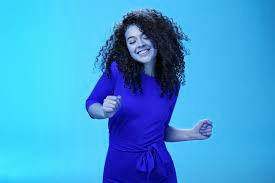

In [7]:
i1

In [8]:
i1.shape

(183, 275, 3)

In [9]:
train = ImageDataGenerator(rescale= 1/200)
validatiom  = ImageDataGenerator(rescale= 1/200)

In [11]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Trainig',
                                          target_size = (200, 200),
                                          batch_size = 32,
                                          class_mode = 'binary')

validation_dataset =validatiom.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Validation',
                                                  target_size = (200, 200),
                                                  batch_size = 32,
                                                  class_mode = 'binary')


Found 8 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [13]:
train_dataset.classes
#0 indicates happy pics
#1 indicates Not Happy pics

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

In [20]:
#Applying Max pooling
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape= (200, 200, 3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape= (200, 200, 3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape= (200, 200, 3)),
                                     tf.keras.layers.MaxPool2D(2,2),
                                     #
                                     tf.keras.layers.Flatten(),
                                     #
                                     tf.keras.layers.Dense(512, activation= 'relu'),
                                     tf.keras.layers.Dense(1, activation= 'sigmoid'),
                                     ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss= 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate= 0.001),
              metrics = ['accuracy']
              )

In [22]:
model_fit  = model.fit(train_dataset)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6250 - loss: 0.6869


In [14]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Testing'
for i in os.listdir(dir_path):
  print(i)

33.jpg
22.jpg
4.jpg
3.jpg
2.jpg
44.jpg


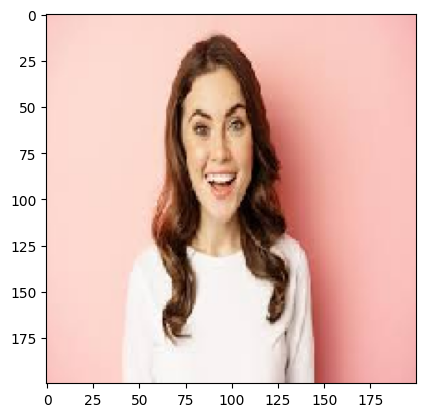

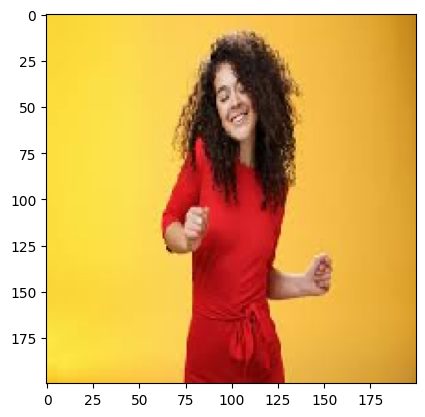

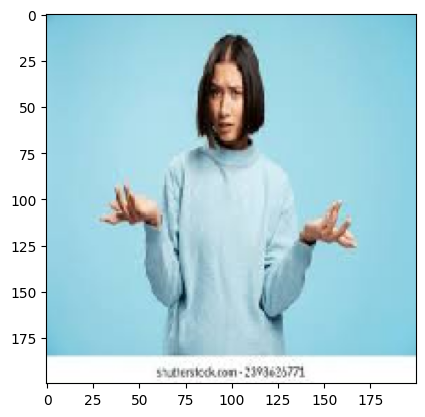

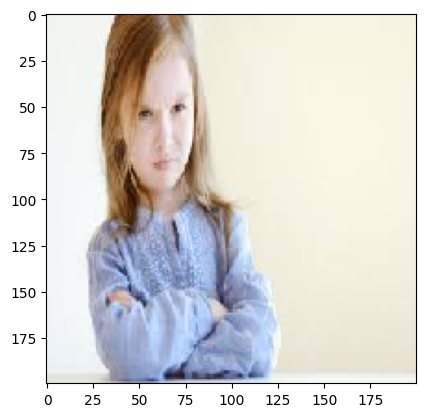

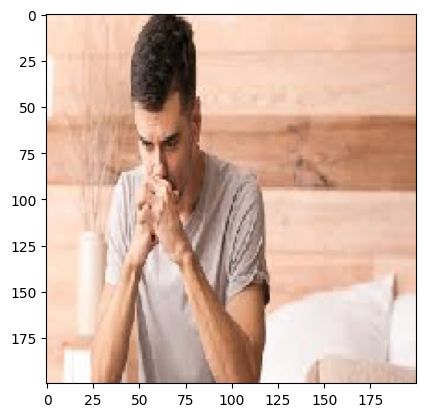

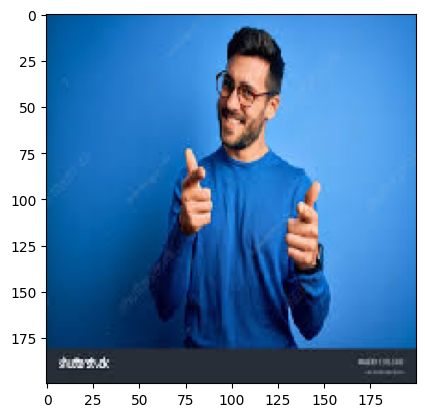

In [23]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' +i, target_size= (200, 200))
  plt.imshow(img)
  plt.show()

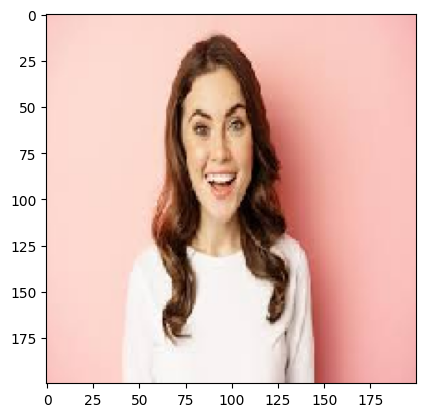

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
I Not Happy!


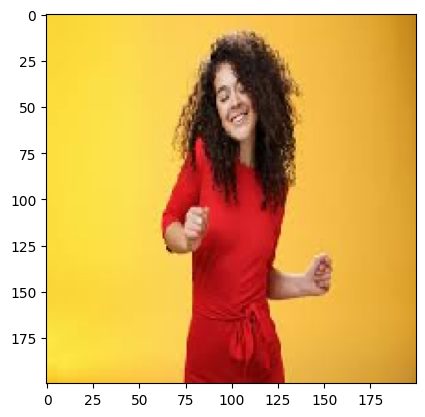

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
I Not Happy!


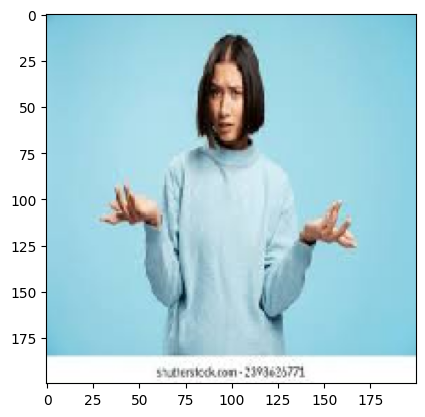

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
I Not Happy!


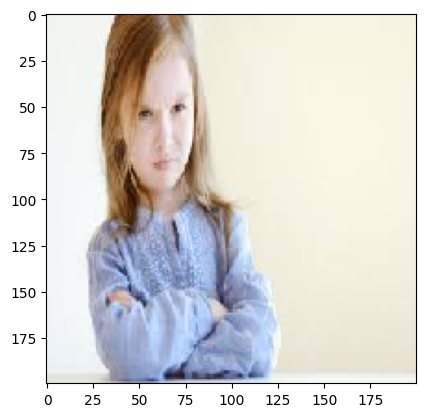

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
I Not Happy!


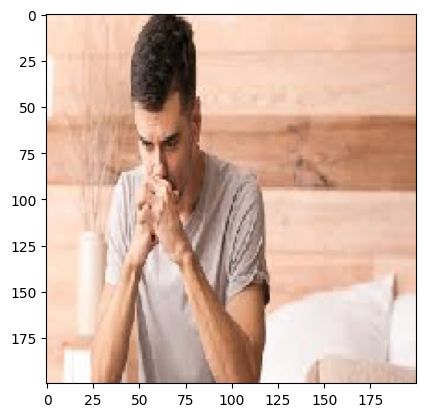

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
I Not Happy!


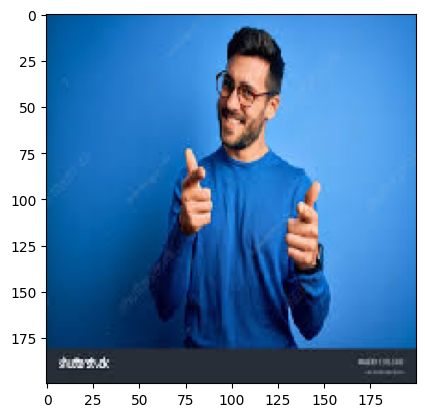

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
I Not Happy!


In [24]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/CNN-Happy-Sad-project/Testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' +i, target_size= (200, 200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("I am Happy!")
  else:
    print("I Not Happy!")
